# S&P500 Sector Analysis for Asset Allocation

#### Below I analyse the historic performance of the 11 S&P500 sectors with the purpose of building an argument regrading asset allocation.

#### To run the analysis, I download historical colsing prices of the follwing Select Sector SPDR Funds and of the SPY.
* Energy: XLE
* Materials: XLB
* Industrials: XLI
* Consumer Discretionary: XLY
* Consumer Staples: XLP
* Health Care: XLV
* Financials: XLF
* Technology: XLK
* Communication Services: XTC
* Utilities: XLU
* Real Estate: XLRE

#### I meassure the historical cumulative performace of each sector relative to the index and I plot where we are today compared to the historical average.

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [17]:
start = '2000-01-01'
end = dt.datetime.today() - timedelta(1) # Yesterday
sector_tickers = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XLC', 'XLU', 'XLRE']
df_adjClose = pd.DataFrame()

for ticker in sector_tickers:
        df_aux = web.DataReader(ticker, 'yahoo', start, end)
        df_adjClose['{}'.format(ticker)] = df_aux['Adj Close'] 

df_aux = web.DataReader('SPY', 'yahoo', start, end)
df_adjClose['SPY'] = df_aux['Adj Close']
df_adjClose.fillna(0, inplace = True)

In [43]:
returns = pd.DataFrame()
cum_returns = pd.DataFrame()

for column in df_adjClose:
    returns[column] = np.log(df_adjClose[column]/df_adjClose[column].shift(1))

returns.replace(np.inf, 0, inplace = True)
    
for column in returns:
    cum_returns[column] = returns[column].cumsum()

#### Below I show a correlations heatmap. All sectors are highly correlated with each other and with the index. The Real Estate sector seems to be the less correlated to all other sectors and Utilities seems to be low correlated with Communication Services.

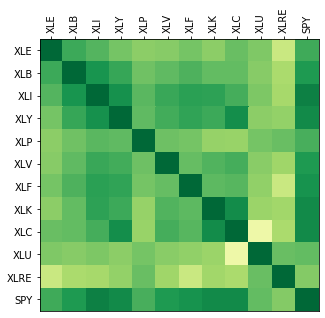

In [46]:
corrs = pd.DataFrame()

corrs = returns.corr()

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
heatmap = ax.pcolor(corrs.values, cmap = 'RdYlGn')
heatmap.set_clim(-1,1)
column_labels = corrs.columns
row_lables = corrs.index
ax.set_xticklabels(column_labels)
ax.set_yticklabels(row_lables)
ax.invert_yaxis()
ax.xaxis.tick_top()
plt.xticks(rotation = 'vertical')
ax.set_xticks(np.arange(corrs.values.shape[0]) + 0.5, minor = False)
ax.set_yticks(np.arange(corrs.values.shape[0]) + 0.5, minor = False)

heatmap

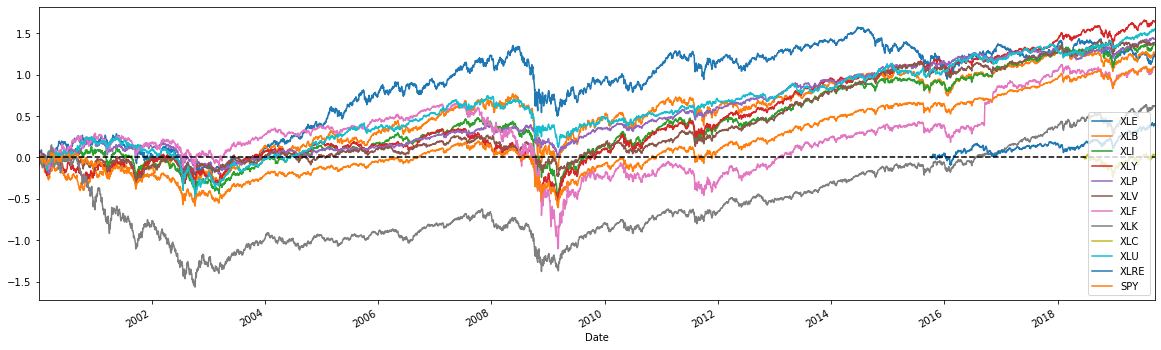

In [52]:
ax = cum_returns.plot(figsize = (20,6), legend = True)
ax.axhline(0, color='black', linestyle='--')

In [53]:
difs = pd.DataFrame()

for column in cum_returns:
    difs['{} - SPY'.format(column)] = cum_returns[column] - cum_returns['SPY']

difs.drop(columns = 'SPY - SPY', inplace = True)

AxesSubplot(0.125,0.827692;0.775x0.0523077)
AxesSubplot(0.125,0.764923;0.775x0.0523077)
AxesSubplot(0.125,0.702154;0.775x0.0523077)
AxesSubplot(0.125,0.639385;0.775x0.0523077)
AxesSubplot(0.125,0.576615;0.775x0.0523077)
AxesSubplot(0.125,0.513846;0.775x0.0523077)
AxesSubplot(0.125,0.451077;0.775x0.0523077)
AxesSubplot(0.125,0.388308;0.775x0.0523077)
AxesSubplot(0.125,0.325538;0.775x0.0523077)
AxesSubplot(0.125,0.262769;0.775x0.0523077)
AxesSubplot(0.125,0.2;0.775x0.0523077)


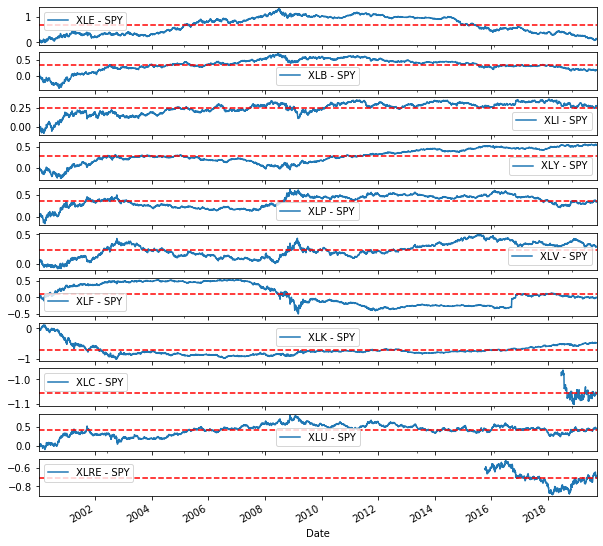

In [60]:
fig, axes = plt.subplots(nrows = len(difs.columns), ncols = 1)

for count, col in enumerate(difs):
    fig = 'f{}'.format(count)
    line = 'l{}'.format(count)
    fig = difs[col].plot(ax=axes[count], figsize = (10,10), legend = True, sharex = True)
    line = axes[count].axhline(difs[col].mean(), color='red', ls='--')
    print(fig)

#### Of the 11 sectors, the ones that might have the largest upside if they potentially reverse back to their historical means are:
* XLE: Energy
* XLB: Materials

#### On the other hand, the ones that might have the largest downside if they potentially reverse back to their historical means are:
* XLY: Consumer Discretionary
* XLK: Technology